In [1]:
import tensorflow as tf
from tensorflow.keras import layers as ly
from tensorflow.keras.models import Sequential
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer

In [3]:
tokenizer = Tokenizer()

with open("data/irish-lyrics.txt", "r") as f:
    data = f.read()
    
corpus = data.lower().split('\n')
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1


In [5]:
tokenizer.word_index

{'the': 1,
 'and': 2,
 'i': 3,
 'to': 4,
 'a': 5,
 'of': 6,
 'my': 7,
 'in': 8,
 'me': 9,
 'for': 10,
 'you': 11,
 'all': 12,
 'was': 13,
 'she': 14,
 'that': 15,
 'on': 16,
 'with': 17,
 'her': 18,
 'but': 19,
 'as': 20,
 'when': 21,
 'love': 22,
 'is': 23,
 'your': 24,
 'it': 25,
 'will': 26,
 'from': 27,
 'by': 28,
 'they': 29,
 'be': 30,
 'are': 31,
 'so': 32,
 'he': 33,
 'old': 34,
 'no': 35,
 'oh': 36,
 'ill': 37,
 'at': 38,
 'one': 39,
 'his': 40,
 'there': 41,
 'were': 42,
 'heart': 43,
 'down': 44,
 'now': 45,
 'we': 46,
 'where': 47,
 'young': 48,
 'never': 49,
 'go': 50,
 'come': 51,
 'then': 52,
 'did': 53,
 'not': 54,
 'said': 55,
 'away': 56,
 'their': 57,
 'sweet': 58,
 'them': 59,
 'green': 60,
 'if': 61,
 'take': 62,
 'our': 63,
 'like': 64,
 'night': 65,
 'day': 66,
 'o': 67,
 'out': 68,
 'fair': 69,
 'this': 70,
 'town': 71,
 'have': 72,
 'can': 73,
 'true': 74,
 'its': 75,
 'thou': 76,
 'see': 77,
 'dear': 78,
 'more': 79,
 'theres': 80,
 'or': 81,
 'had': 82,
 'wou

In [6]:
total_words

2690

In [9]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_seq = token_list[:i+1]
        input_sequences.append(n_gram_seq)

In [12]:
input_sequences[:20]

[[51, 12],
 [51, 12, 96],
 [51, 12, 96, 1217],
 [51, 12, 96, 1217, 48],
 [51, 12, 96, 1217, 48, 2],
 [51, 12, 96, 1217, 48, 2, 69],
 [2, 11],
 [2, 11, 15],
 [2, 11, 15, 31],
 [2, 11, 15, 31, 361],
 [2, 11, 15, 31, 361, 8],
 [2, 11, 15, 31, 361, 8, 24],
 [2, 11, 15, 31, 361, 8, 24, 1218],
 [272, 798],
 [272, 798, 2],
 [272, 798, 2, 204],
 [272, 798, 2, 204, 24],
 [272, 798, 2, 204, 24, 579],
 [272, 798, 2, 204, 24, 579, 69],
 [118, 35]]

In [13]:
max_sequence_len = max([len(x) for x in input_sequences])
max_sequence_len

16

In [14]:
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding="pre"))

xs, labels = input_sequences[:, :-1], input_sequences[:, -1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [21]:
tokenizer.word_index["morning"]

104


In [28]:
print(xs[6])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]


In [27]:
print(ys[6])

[0. 0. 0. ... 0. 0. 0.]


In [30]:
model = Sequential([
    ly.Embedding(total_words, 100, input_length=max_sequence_len-1),
    ly.Bidirectional(ly.LSTM(150)),
    ly.Dense(total_words, activation="softmax")
])
adam = Adam(lr=0.01)
model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=["accuracy"])

In [31]:
history = model.fit(xs, ys, epochs=100, verbose=1)

Epoch 1/100
377/377 [==============================] - 5s 15ms/step - loss: 6.6481 - accuracy: 0.0713
Epoch 2/100
377/377 [==============================] - 5s 14ms/step - loss: 5.7770 - accuracy: 0.1131
Epoch 3/100
377/377 [==============================] - 5s 14ms/step - loss: 4.9582 - accuracy: 0.1581
Epoch 4/100
377/377 [==============================] - 5s 14ms/step - loss: 4.0597 - accuracy: 0.2289
Epoch 5/100
377/377 [==============================] - 5s 14ms/step - loss: 3.1971 - accuracy: 0.3317
Epoch 6/100
377/377 [==============================] - 5s 13ms/step - loss: 2.4932 - accuracy: 0.4444
Epoch 7/100
377/377 [==============================] - 5s 14ms/step - loss: 1.9697 - accuracy: 0.5484
Epoch 8/100
377/377 [==============================] - 5s 14ms/step - loss: 1.6504 - accuracy: 0.6121
Epoch 9/100
377/377 [==============================] - 5s 14ms/step - loss: 1.4043 - accuracy: 0.6647
Epoch 10/100
377/377 [==============================] - 5s 14ms/step - loss: 1.201

377/377 [==============================] - 4s 10ms/step - loss: 1.0871 - accuracy: 0.7274
Epoch 81/100
377/377 [==============================] - 4s 10ms/step - loss: 0.9613 - accuracy: 0.7535
Epoch 82/100
377/377 [==============================] - 4s 11ms/step - loss: 0.9642 - accuracy: 0.7587
Epoch 83/100
377/377 [==============================] - 4s 11ms/step - loss: 0.8711 - accuracy: 0.7760
Epoch 84/100
377/377 [==============================] - 4s 11ms/step - loss: 0.8590 - accuracy: 0.7789
Epoch 85/100
377/377 [==============================] - 4s 10ms/step - loss: 0.8422 - accuracy: 0.7793
Epoch 86/100
377/377 [==============================] - 4s 10ms/step - loss: 0.8441 - accuracy: 0.7832
Epoch 87/100
377/377 [==============================] - 4s 10ms/step - loss: 0.8477 - accuracy: 0.7789
Epoch 88/100
377/377 [==============================] - 4s 10ms/step - loss: 0.8799 - accuracy: 0.7701 0s - loss: 0
Epoch 89/100
377/377 [==============================] - 4s 10ms/step - lo

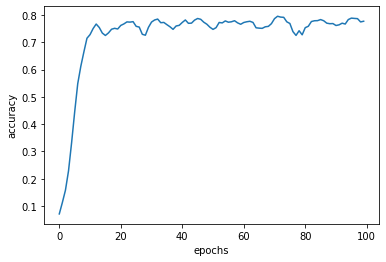

In [35]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

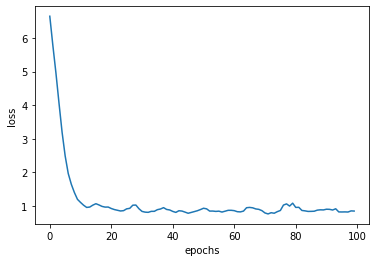

In [36]:
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [39]:
t = "I've got a bad feeling about this"

for i in range(100):
    token_list = tokenizer.texts_to_sequences([t])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding="pre")
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    t += " " + output_word
print(t)

I've got a bad feeling about this proud old woman did say and never rose but passed away thee little girl i are gone and the meadows where theres never on whiskey and pipes bellows chanters and all times as the rocky bright eyes eyes jolly as any star the young ones turning grey coat bath stuck was high in now gone alas if i could hear in what now since you love you still my dear mothers wailing cries and pain taken her fathers name he stands today and ive ended me this the the mother water lovely door and welcome is roving again with her


In [42]:
tokenizer.word_index["say"]

125

In [43]:
tokenizer.word_index["says"]

303